Chapter 08

# 平面几何变换
Book_4《矩阵力量》 | 鸢尾花书：从加减乘除到机器学习 (第二版)

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def lighten_color(rgb, percentage):
    """
    让给定的 RGB 颜色变浅指定百分比。
    
    参数：
        rgb (tuple): 原始 RGB 颜色，每个值在 [0, 1] 之间。
        percentage (float): 变浅的比例，取值在 [0, 1] 之间。
        
    返回：
        tuple: 变浅后的 RGB 颜色。
    """
    # 确保输入的 RGB 值和百分比在合法范围
    if not all(0 <= c <= 1 for c in rgb):
        raise ValueError("RGB 值必须在 (0, 1) 范围内。")
    if not (0 <= percentage <= 1):
        raise ValueError("百分比必须在 [0, 1] 范围内。")
    
    # 计算新的 RGB 值
    return tuple(c + (1 - c) * percentage for c in rgb)

In [3]:
## 定义可视化函数
def visualize(X_square_original,
              X_grid, X_shape, title_txt):
    fig, ax = plt.subplots()  # 创建绘图窗口
    
    # 绘制变换后的网格
    for i in range(X_grid.shape[0]):
        plt.plot(X_grid[i, :, 0], X_grid[i, :, 1], 'k-', linewidth=0.5)  # 绘制网格行
    for j in range(X_grid.shape[1]):
        plt.plot(X_grid[:, j, 0], X_grid[:, j, 1], 'k-', linewidth=0.5)  # 绘制网格列
    
    # 绘制变换后的散点，并用HSV色彩渲染
    colors = plt.cm.hsv(np.linspace(0, 1, X_shape.shape[0]))  # HSV 色彩映射
    for i in range(X_shape.shape[0]):
        plt.plot(X_shape[i, 0], X_shape[i, 1], 'o', color=colors[i], markersize=4, zorder=1000)  # 绘制散点
        plt.plot(X_square_original[i, 0], X_square_original[i, 1], 'o', color=lighten_color(colors[i], 0.78), markersize=4)
        plt.plot((X_shape[i, 0],X_square_original[i, 0]),
                 (X_shape[i, 1],X_square_original[i, 1]), lw = 0.25, color = lighten_color(colors[i], 0.78), zorder=1)
    
    # 绘制变换后的坐标轴方向向量
    # plt.quiver(0, 0, X_vec[0, 0], X_vec[1, 0], angles='xy', scale_units='xy', scale=1, color=[0, 0.4392, 0.7529])  # 绘制第一个向量
    # plt.quiver(0, 0, X_vec[0, 1], X_vec[1, 1], angles='xy', scale_units='xy', scale=1, color=[1, 0, 0])  # 绘制第二个向量
    
    # 绘制 x 和 y 轴
    plt.axvline(x=0, color='k', zorder=0)  # 绘制 x 轴
    plt.axhline(y=0, color='k', zorder=0)  # 绘制 y 轴
    
    # 设置标签和网格
    # plt.ylabel('$x_2$')  # y轴标签
    # plt.xlabel('$x_1$')  # x轴标签
    # 移除 x 和 y 轴的刻度
    ax.tick_params(axis='both', which='both', length=0, labelbottom=False, labelleft=False)
    
    # 移除 x 和 y 轴标签
    ax.set_xlabel("")
    ax.set_ylabel("")
    ax.set_aspect(1)  # 设置坐标轴比例
    ax.set_xlim([-3, 3])  # x轴范围
    ax.set_ylim([-3, 3])  # y轴范围
    ax.grid(linestyle='--', linewidth=0.15, color=[0.8, 0.8, 0.8])  # 添加网格
    plt.title(title_txt)  # 设置图标题
    # plt.savefig(title_txt + '.svg')

In [4]:
def generate_square_border_scatter(n):
    """
    生成平面上正方形边框均匀排布的散点坐标，按顺时针顺序排列。

    参数：
        n (int): 每条边上的散点数。

    返回：
        np.ndarray: 一个二维数组，每行代表一个点，
                    第一列为 x1 坐标，第二列为 x2 坐标。
    """
    # 创建边框上的散点坐标
    x = np.linspace(-1, 1, n)  # 边框坐标范围

    # 上边框的点（从左到右）
    top = np.column_stack((x, np.full_like(x, 1)))
    # 右边框的点（从上到下）
    right = np.column_stack((np.full_like(x, 1), np.flip(x)))
    # 下边框的点（从右到左）
    bottom = np.column_stack((np.flip(x), np.full_like(x, -1)))
    # 左边框的点（从下到上）
    left = np.column_stack((np.full_like(x, -1), x))

    # 按顺时针顺序合并所有边框点
    points = np.vstack((top, right, bottom, left))

    return points

## 准备数据

In [5]:
## 创建一个包含足够大的1x1网格区域
x_vals = np.arange(-10,10+1)  # x轴网格点
y_vals = np.arange(-10,10+1)  # y轴网格点
X1, X2 = np.meshgrid(x_vals, y_vals)  # 生成网格
X_grid = np.stack([X1, X2], axis=2)  # 将网格堆叠为3维数组

In [6]:
X_vec = np.array([[1, 0],
                  [0, 1]])  # 初始坐标轴向量

In [7]:
X_square = generate_square_border_scatter(20)

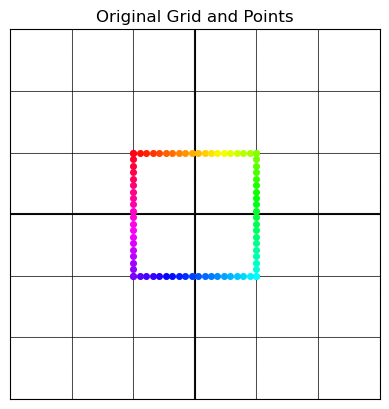

In [8]:
## 绘制原始网格、散点和坐标轴向量
visualize(X_square,
          X_grid, 
          X_square, 
          'Original Grid and Points')  # 绘制原始图像

## 平移

In [9]:
t1 = np.array([[-1.5],
               [1]])

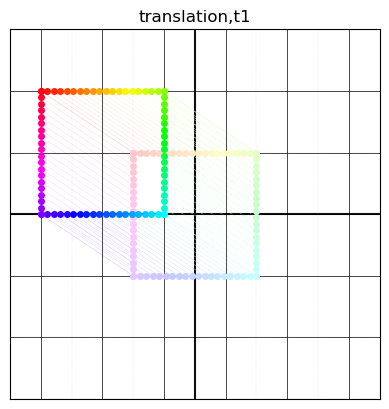

In [10]:
## 绘制原始网格、散点和坐标轴向量
visualize(X_square,
          X_grid + t1.T, 
          X_square + t1.T, 
          'translation,t1')  # 绘制原始图像

In [11]:
t2 = -t1

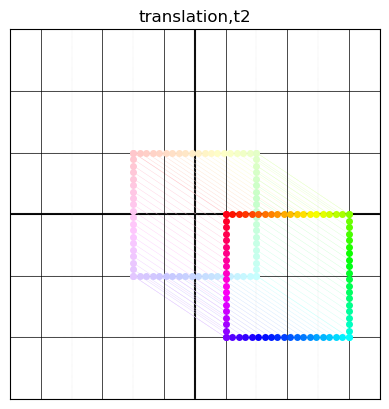

In [12]:
## 绘制原始网格、散点和坐标轴向量
visualize(X_square,
          X_grid + t2.T, 
          X_square + t2.T, 
          'translation,t2')  # 绘制原始图像

## 等比例缩放

In [13]:
S_up = np.array([[2,0],
                 [0,2]])

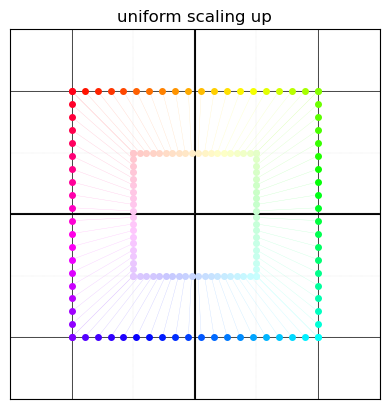

In [14]:
## 绘制原始网格、散点和坐标轴向量
visualize(X_square,
          X_grid @ S_up.T, 
          X_square @ S_up.T, 
          'uniform scaling up')  # 绘制原始图像

In [15]:
S_down = np.linalg.inv(S_up)
S_down

array([[0.5, 0. ],
       [0. , 0.5]])

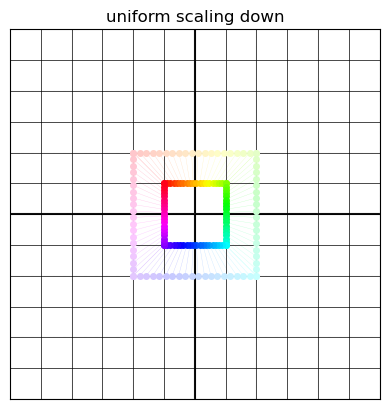

In [16]:
## 绘制原始网格、散点和坐标轴向量
visualize(X_square,
          X_grid @ S_down.T, 
          X_square @ S_down.T, 
          'uniform scaling down')  # 绘制原始图像

## 旋转

In [17]:
# 定义一个函数，用于生成二维平面的旋转矩阵
def rotation_matrix(theta):
    """
    生成二维旋转矩阵
    :param theta: 旋转角度（单位：弧度）
    :return: 2x2旋转矩阵
    """
    return np.array([[np.cos(theta), -np.sin(theta)],  # 第一行：[cos(theta), -sin(theta)]
                     [np.sin(theta),  np.cos(theta)]])  # 第二行：[sin(theta), cos(theta)]

In [18]:
# 定义要旋转的角度（以弧度为单位）
angle = 2* np.pi / 3  # 45度对应的弧度值

# 调用函数生成对应的旋转矩阵
R = rotation_matrix(angle)  # 计算45度旋转矩阵

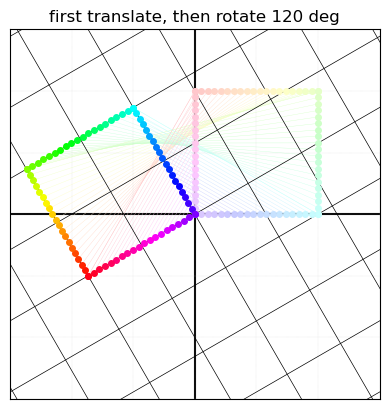

In [19]:
t_1 = np.array([[1],
               [1]])

## 绘制原始网格、散点和坐标轴向量
visualize(X_square + t_1.T,
          (X_grid + t_1.T) @ R.T, 
          (X_square + t_1.T) @ R.T, 
          'first translate, then rotate 120 deg')  # 绘制原始图像